## Analysis on Top 200 Spotify Charts from 2017 to 2020 in the Americas

For this report we will be looking at the features of songs that are ranked in Spotify's Top 200 Charts. Our goal is to find the most common characteristics of songs that make it into various countries Top 200 Spotify Charts. We are curious about the effects of a country's culture on its Spotify Chart's as well as the influence of countries on others' charts. Spotify's API allows for the retrieval of a particular song's musical properties. Our analysis focuses on countries located in the Americas and evaluates the following song features: *Genre*, *Danceability*,  *Energy*, *Acousticness*.

The countries in our analysis are:
- United States 
- Argentina 
- Bolivia 
- Brazil
- Canada
- Chile
- Colombia
- Costa Rica
- Dominican Republic
- Ecuador
- Guatemala
- Honduras
- Mexico
- Nicaragua
- Panama
- Peru
- Paraguay
- El Salvadore
- Uruguay 


### Correlation between Song Feature (*Danceability*,  *Energy*, *Acousticness*) and Top Chart Rank

We would like to investigate the relationship between the position of a song in the Top 200 Chart and its features/characteristics: *Danceability*,  *Energy*, *Acousticness*. This would give insight on the most common properties of a hit song. The presences of all features of a song are measured between 0 (weak) and 1 (strong). Danceability describes how danceabke a song is, Energy describes the tempo/upbeatness of a song, and Acousticness describes the lack of electrical amplification of a song. The following are plots of the correlation between each feature and chart rank over Time (in Weeks).

In [ ]:
import datetime
import pandas as pd
import sqlalchemy as sqla
engine = sqla.create_engine('sqlite:///top200data')
df_all = pd.read_sql('select * from top200data',engine)
read_csv('../data/top200data.csv').to_sql("top200data", engine)

Text(0.5, 1.0, 'Acousticness and Chart Rank Correlation over Time')

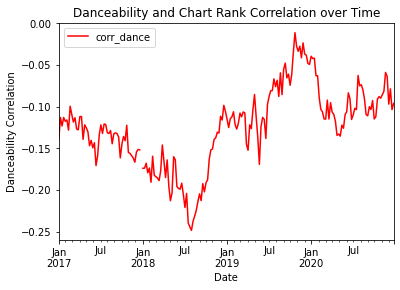

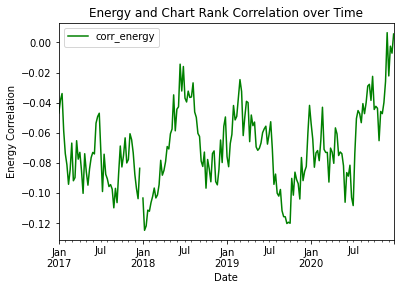

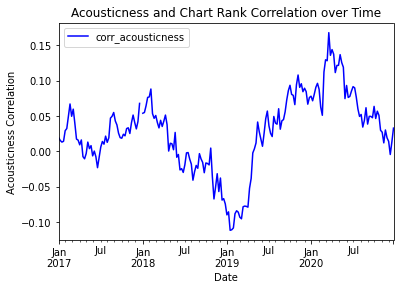

In [8]:
corr_df = pd.read_csv("../data/correlationsdata.csv")
corr_df["date"] = pd.to_datetime(corr_df['date'],format='%Y-%m-%d')

dance_plot = corr_df.plot("date", "corr_dance", color = "r")
dance_plot.set_xlabel("Date")
dance_plot.set_ylabel("Danceability Correlation")
dance_plot.set_title("Danceability and Chart Rank Correlation over Time")

energy_plot = corr_df.plot("date", "corr_energy" ,color = "g")

energy_plot.set_xlabel("Date")
energy_plot.set_ylabel("Energy Correlation")
energy_plot.set_title("Energy and Chart Rank Correlation over Time")

acou_plot = corr_df.plot("date", "corr_acousticness", color = "b")
acou_plot.set_xlabel("Date")
acou_plot.set_ylabel("Acousticness Correlation")
acou_plot.set_title("Acousticness and Chart Rank Correlation over Time")


We observe a "peak" in of correlation between *Danceability* and song chart rank in July 2018. With a maximum correlation of -0.25. This is interpreted as the top chart songs having a rough linear relationship with danceability score. This peak in correlation may be due to particular summer songs that are more danceable. However, further analysis may be need to make a conclusion.

Once again we observe a relative peak in *Energy* and song chart rank correlation in July, but this time is in 2019. Another "peak" in *Energy* occurs in January 2018. The correlations are low however (-0.12), indicating that the relationship may not  be statistically meaningful.

The Acousticness and Chart Rank Correlation vs. Time has an interesting behaviour in the months of January 2019 and 2020. In January 2019, the correlation between *Acousticness* reaches a "peak" (-0.12), meaning that the relationship between songs' acousticness and song ranks on the higher portion of the plot are relatively stronger. On the other hand, in January 2020, we see the opposite occur with a peak in positive correlation of 0.15. THis indicates that songs on the higher ranks have less of the *Acousticness* characteristic.

### Rank Biased Overlap to Measure Similarity in Countries Top Charts
To find the similarities in song rank order in Top 200 Charts between two countries we utilized Rank Biased Overlap (RBO). The RBO method produces a number between 0 and 1 that indicates strength in similarity between two lists. An RBO score close to one indicate a very similar rank order between the lists, and score near zero indicates a nearly disjoint pair of lists. We chose the RBO parameter of p to equal 0.9 to give the top elmenents in each list more of a contribution to the RBO score.

We primarily wanted to focus on two pairs of countries that neighbor each other. The first pair being United States (US) and Mexico (MX) and the other being US and Canada (CA). The following are RBO score vs Time (in Weeks) of each pair.




Text(0.5, 1.0, 'RBO score vs Time (in Weeks): US and MX')

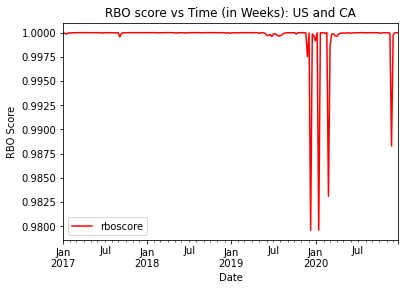

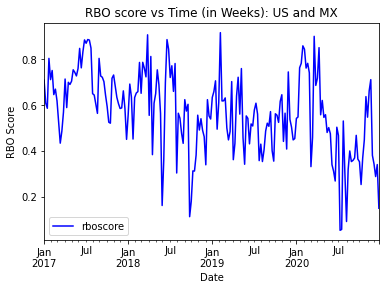

In [12]:
##List of Dates
import datetime
start_date = datetime.date(2017, 1, 6)
end_date = datetime.date(2020, 12, 25)
delta = datetime.timedelta(days = 7)
ls_date = []
while start_date <= end_date:
    ls_date.append(str(start_date))
    start_date += delta

##RBO
feat_df = pd.read_csv("../data/songsdata.csv")

def rbo(list1, list2, p=0.9):
   import math
    # tail recursive helper function
   def helper(ret, i, d):
       l1 = set(list1[:i]) if i < len(list1) else set(list1)
       l2 = set(list2[:i]) if i < len(list2) else set(list2)
       a_d = len(l1.intersection(l2))/i
       term = math.pow(p, i) * a_d
       if d == i:
           return ret + term
       return helper(ret + term, i + 1, d)
   k = max(len(list1), len(list2))
   x_k = len(set(list1).intersection(set(list2)))
   summation = helper(0, 1, k)
   return ((float(x_k)/k) * math.pow(p, k)) + ((1-p)/p * summation)

rbo_df = pd.DataFrame(columns = ["date","rboscore"])
for i in range(len(df_all["date"].unique())):
    readdf = pd.read_sql(f'select * from top200data where date = "{ls_date[i]}"',engine)
    merge_temp = pd.merge(readdf, feat_df, on= "songcode")
    ussongs_list = list(merge_temp[merge_temp["regioncode"] == "us"]["song_x"])
    casongs_list = list(merge_temp[merge_temp["regioncode"] == "ca"]["song_x"])
    rbo_df.loc[i] = [f"{ls_date[i]}", rbo(ussongs_list,casongs_list, p = 0.9)]
rbo_df["date"] = pd.to_datetime(rbo_df['date'],format='%Y-%m-%d')

us_ca_plot = rbo_df.plot("date" , "rboscore", color = "r")
us_ca_plot.set_xlabel("Date")
us_ca_plot.set_ylabel("RBO Score")
us_ca_plot.set_title("RBO score vs Time (in Weeks): US and CA")

rbo_df = pd.DataFrame(columns = ["date","rboscore"])
for i in range(len(df_all["date"].unique())):
    readdf = pd.read_sql(f'select * from top200data where date = "{ls_date[i]}"',engine)
    merge_temp = pd.merge(readdf, feat_df, on= "songcode")
    ussongs_list = list(merge_temp[merge_temp["regioncode"] == "us"]["song_x"])
    casongs_list = list(merge_temp[merge_temp["regioncode"] == "mx"]["song_x"])
    rbo_df.loc[i] = [f"{ls_date[i]}", rbo(ussongs_list,casongs_list, p = 0.9)]
rbo_df["date"] = pd.to_datetime(rbo_df['date'],format='%Y-%m-%d')
us_mx_plot = rbo_df.plot("date" , "rboscore", color = "b")
us_mx_plot.set_xlabel("Date")
us_mx_plot.set_ylabel("RBO Score")
us_mx_plot.set_title("RBO score vs Time (in Weeks): US and MX")


Both plots are very different in regards to behaviour. We observe that the RBO score vs Time plot for US and CA shows an almost identical relationship between both countries' song rank order. On the other hand, the MX and US plot shows a fluctuation in RBO score between 0.2 and 0.8 across all dates. This may be due to a portion of hit songs from Mexico being in Spanish or pertaining to the Latino culture. There could be a diverse mix of popular songs in the US and Hispanic music in MX's top charts. This mix appears to fluctuate over the time of the years 2017-2020.

<ipython-input-19-e24b5a792ca8>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Streams (in Hundred Millions)')

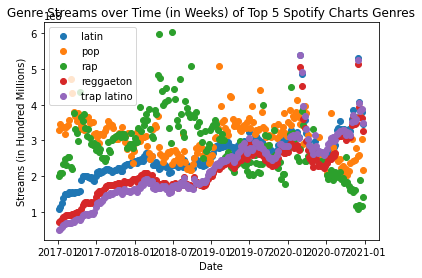

In [19]:
#Genre Plot 
from matplotlib import pyplot as plt
genre_streams_df = pd.read_csv("../data/genredata.csv")
topgenres = ['pop', 'rap', 'latin', 'trap latino', 'reggaeton']
topgenres_df = genre_streams_df[genre_streams_df.genre.isin(topgenres)]
topgenres_df["date"] = pd.to_datetime(topgenres_df['date'],format='%Y-%m-%d')
grouped = topgenres_df.groupby("genre")
for name, group in grouped:
    plt.plot(group["date"], group["streams"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Genre Streams over Time (in Weeks) of Top 5 Spotify Charts Genres")
plt.xlabel("Date")
plt.ylabel("Streams (in Hundred Millions)")

From the plot above, we observe a steady increase of the genres *trap latino* and *reggaeton* from 2017 to 2020. It appears that the *latino* genre follows this steady increase as well. There seems to be a slight decrease in *rap* genre streams from mid-2018 to late-2020. The wave of trap latino that occurred in 2017 all the way through 2020 most likely explains the increase in genre streams. Rising latino artists such as *Bad Bunny*, *Ozuna*, *Anuel AA*, and other artists, greatly contribute to the increase in *reggaeton* and *trap latino* streams.

### Interactive Plot
The following interctive plot allows readers to view data in a visually appealing way. Readers can choose to explore the top 3 songs, artists, or genres from the 2017-2020 Spotify top 200 charts, readers can also view by weekly, monthly, and yearly.

In [1]:
import dash
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import numpy as np
import sqlalchemy as sqla

import pycountry
def alpha3(country):
    try:
        return pycountry.countries.get(name=country).alpha_3
    except:
        pass
        
countries = pd.read_csv("../data/countriesdata.csv").drop(columns=["Unnamed: 0"])
countries["code3"] = countries['country'].apply(lambda x: alpha3(x))

countries.loc[2, "code3"]="BOL"

countries['color']=range(19)

def listunique(list):
    unique = []
    for i in list:
        if i not in unique:
            unique.append(i)
    return unique

import datetime
start_date = datetime.date(2017, 1, 6)
end_date = datetime.date(2020, 12, 25)
delta = datetime.timedelta(days = 7)
ls_date = []
while start_date <= end_date:
    ls_date.append(str(start_date))
    start_date += delta

In [4]:
#App Layout
app = JupyterDash(__name__)

periods = {
    'Weekly': ls_date[:-1],
    'Monthly': listunique([x[:-3] for x in ls_date][:-1]),
    'Yearly': ["2017", "2018", "2019", "2020"]
}

app.layout = html.Div([
    html.H1("Most Popular Music in the Americas (2017-2020)", style={'text-align':'center'}),
    dcc.Dropdown(id="Select_Type",
                options=[
                    {"label":"Song","value":"Song"},
                    {"label":"Artist","value":"Artist"},
                    {"label":"Genre","value":"Genre"}],
                placeholder="Choose a Type (Song, Artist, Genre)"
                ),
    dcc.Dropdown(id="Select_Period",
                options=[
                    {"label":"Weekly","value":"Weekly"},
                    {"label":"Monthly","value":"Monthly"},
                    {"label":"Yearly","value":"Yearly"}],
                placeholder="Choose Date by (Weekly, Monthly, Yearly)"
                ),
    dcc.Dropdown(id="Select_Date",
                placeholder="Choose a Daterange"
                ),
    html.Div(id='Loading Status'),
    dcc.Graph(id='Map',style={'width': '100%'})


    ])

##Update Options
@app.callback(
    dash.dependencies.Output(component_id="Select_Date", component_property="options"),
    dash.dependencies.Input(component_id="Select_Period", component_property="value")
    )
def update_options(value):
    return [{'label': i, 'value': i} for i in periods[value]]
    
##Plot Map
@app.callback(
    [Output(component_id="Map", component_property="figure"),
     Output(component_id="Loading Status", component_property="children")],
    [Input(component_id="Select_Type", component_property="value"),
    Input(component_id="Select_Period", component_property="value"),
    Input(component_id="Select_Date", component_property="value")]
    )
def update_figure(type_value,period_value,date_value):
    figdata = countries.copy()
    figdata["value"]=""
    figdata["value"].astype("object")
    ##Weekly, Songs
    if type_value=='Song' and period_value=='Weekly':
        for i, code in enumerate(figdata['code']):
            figdata.at[i,'value'] = pd.read_sql('SELECT song FROM top200data WHERE id LIKE "{}%{}" AND rank in (1,2,3) AND song IS NOT NULL'\
                                                 .format(date_value, code),engine).values
    ##Monthly/Yearly, Songs
    if type_value=='Song' and (period_value=='Monthly' or 'Yearly'):
        for i, code in enumerate(figdata['code']):
            monthly = pd.read_sql('SELECT * FROM top200data WHERE date like "{}%" AND regioncode = "{}" AND song IS NOT NULL'\
                                  .format(date_value, code) ,engine)
            monthly['streams'] = monthly['streams'].apply(lambda x: int(x.replace(",","")))
            figdata.at[i,'value'] = monthly.groupby(["song","songcode","regioncode"]).streams.sum().sort_values(ascending=False)[0:3].keys().get_level_values(0)
    
    ##Artist
    if type_value=='Artist':
        for i, code in enumerate(figdata['code']):
            artist = pd.read_sql('SELECT * FROM top200data WHERE date like "{}%" AND regioncode = "{}" AND artist IS NOT NULL'\
                                  .format(date_value, code) ,engine)
            artist['streams'] = artist['streams'].apply(lambda x: int(x.replace(",","")))
            artist['artist'] = artist['artist'].apply(lambda x: x.split(', ')[0])
            figdata.at[i,'value'] = artist.groupby(["artist","regioncode"]).streams.sum().sort_values(ascending=False)[0:3].keys().get_level_values(0)

    ##Genre
    if type_value=='Genre':
        for i, code in enumerate(figdata['code']): 
            artist = pd.read_sql('SELECT * FROM top200data WHERE date like "{}%" AND regioncode = "{}" AND artist IS NOT NULL'\
                                  .format(date_value, code) ,engine)
            artist['streams'] = artist['streams'].apply(lambda x: int(x.replace(",","")))
            artist['artist'] = artist['artist'].apply(lambda x: x.split(', ')[0])
            genre = artist.copy().groupby(["artist","regioncode"]).streams.sum().to_frame().merge(pd.read_csv('../data/artistsdata.csv'), left_on="artist", right_on="artist").dropna()
            genre['genre'] = genre['genre'].apply(lambda x: str(x)[1:-1].replace("'","").split(", "))
            figdata.at[i,'value'] = genre.explode('genre').groupby('genre').streams.sum().sort_values(ascending=False)[0:3].keys()    
            
    fig = go.Figure(data=go.Choropleth(
        locations = figdata['code3'],
        z = figdata['color'],
        text = figdata['value'],
        customdata = figdata['code3'],
        hovertemplate = '1. %{text[0]}<br>2. %{text[1]}<br>3. %{text[2]}<extra>%{customdata}</extra>',
        colorscale = 'Rainbow',
        autocolorscale = False,
        reversescale = True,
        showscale = False
    ))

    fig.update_geos(fitbounds="locations")
    fig.update_layout(
        title_text='Americas',
        geo=dict(
            showframe=True,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="https://developer.spotify.com">\
                Spotify</a>',
            showarrow = False
        )]
    )
    status = "The {} Data for Top 3 {}s of {} has been loaded.".format(period_value, type_value, date_value)
    return fig, status


app.run_server('inline', port='8010') #Change the port if it is occupied

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\jupyter_dash\jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
<ipython-input-4-84c644014796> in update_options(value=None)
     39     )
     40 def update_options(value):
---> 41     return [{'label': i, 'value': i} for i in periods[value]]
        global i = undefined
        global periods = {'Weekly': ['2017-01-06', '2017-01-13', '2017-01-20', '2017-01-27', '2017-02-03', '2017-02-10', '2017-02-17', '2017-02-24', '2017-03-03', '2017-03-10', '2017-03-17', '2017-03-24', '2017-03-31', '2017-04-07', '2017-04-14', '2017-04-21', '2017-04-28', '2017-05-05', '2017-05-12', '2017-05-19', '2017-05-26', '2017-06-02', '2017-06-09', '2017-06-16', '2017-06-23', '2017-06-30', '2017-07-07', '2017-07-14', '2017-07-21', '2017-07-28', '2017-08-04', '2017-08-11', '2017-08-18', '2017-08-25', '2017-09-01', '2017-09-08', '2017-09-15', '2017-09-22', '2017-09-29', '2017-10-06', '2017-10-13', '2017-10-20', '2017-10-27', 